In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.metrics import r2_score, accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt

In [2]:
data = pd.read_csv("./Data/Economic_Indicators.csv")
predictors = ['CANQGSP', 'CAODIV','CAOTOT', 'CASTHPI', 'CAWHEA', 'CAWMIN', 'UNEMPLOYCA']
targets = ["Prescriptions Rate","Prescriptions Count",
           "Hospitalizations Rate","Hospitalizations Count",
           "ED Visits Rate", "ED Visits Count",
           "Deaths Rate", "Deaths Count"]

In [3]:
data.head(10)

,QUARTER,CANQGSP,CAODIV,CAOTOT,CASTHPI,CAWHEA,CAWMIN,CAWTOT,UNEMPLOYCA,Prescriptions Rate,Prescriptions Count,Hospitalizations Rate,Hospitalizations Count,ED Visits Rate,ED Visits Count,Deaths Rate,Deaths Count
0,2006 Q1,1852200.0,291666.3,1497168.9,636.97,62027556.0,2108988.0,786281748.0,918200,NaN,NaN,8.63,769.0,10.00,911.0,3.82,348.0
1,2006 Q2,1859177.9,302301.3,1504015.5,642.67,62803436.0,2332112.0,781834944.0,898500,NaN,NaN,9.80,874.0,11.45,1044.0,4.09,375.0
2,2006 Q3,1883269.3,305833.3,1522251.7,644.75,64251000.0,2409328.0,791299448.0,884800,NaN,NaN,8.97,801.0,11.75,1069.0,4.02,369.0
3,2006 Q4,1904301.9,306881.0,1540793.8,640.90,65256928.0,2499664.0,806384972.0,859300,NaN,NaN,9.39,840.0,10.52,956.0,4.13,377.0
4,2007 Q1,1916188.9,311405.4,1565699.3,631.96,66814380.0,2529520.0,826182260.0,865400,NaN,NaN,9.36,843.0,10.93,1006.0,4.52,415.0
5,2007 Q2,1940770.5,325259.2,1580476.3,621.20,67734544.0,2596636.0,832237288.0,885900,NaN,NaN,10.66,970.0,12.53,1154.0,4.56,422.0
6,2007 Q3,1966137.7,327613.7,1582387.7,598.11,68795260.0,2779112.0,834075380.0,919300,NaN,NaN,10.88,991.0,12.52,1154.0,4.13,384.0
7,2007 Q4,2000327.0,329209.4,1597729.9,573.86,70608912.0,2804004.0,846134736.0,973100,NaN,NaN,10.47,953.0,11.50,1056.0,4.64,430.0
8,2008 Q1,1971753.2,336328.8,1602984.4,541.78,71691556.0,2866124.0,843883428.0,1020100,570.16,5205121.0,10.59,981.0,12.44,1166.0,5.07,475.0
9,2008 Q2,2012750.2,334979.6,1622798.6,497.21,72847976.0,3065644.0,847673352.0,1088800,539.45,4925831.0,11.31,1040.0,13.27,1236.0,4.56,425.0


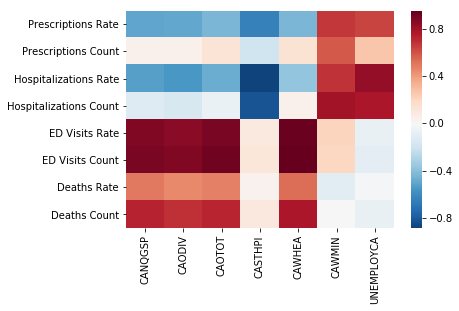

In [4]:
cor_mat = data.corr()[predictors][8:]
ax = sns.heatmap(cor_mat, center = 0, cmap = "RdBu_r")

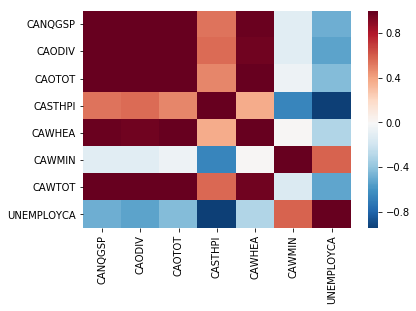

In [5]:
cor_mat1 = data.corr()[predictors][:8]
ax = sns.heatmap(cor_mat1, center = 0, cmap = "RdBu_r")

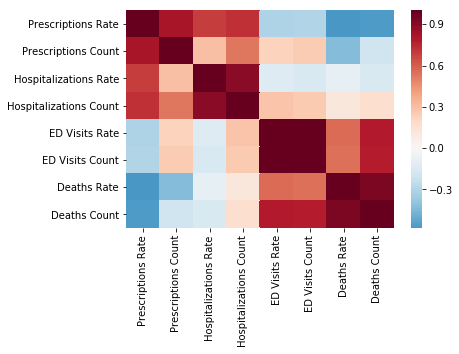

In [6]:
cor_mat2 = data.corr()[targets][8:]
ax = sns.heatmap(cor_mat2, center = 0, cmap = "RdBu_r")

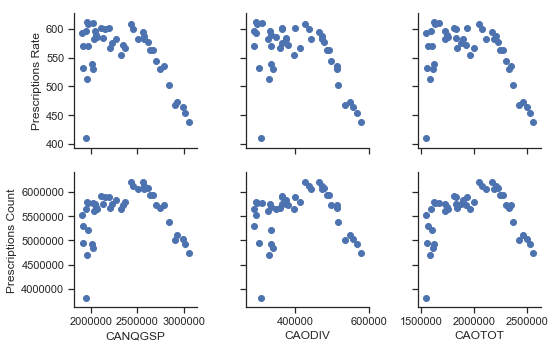

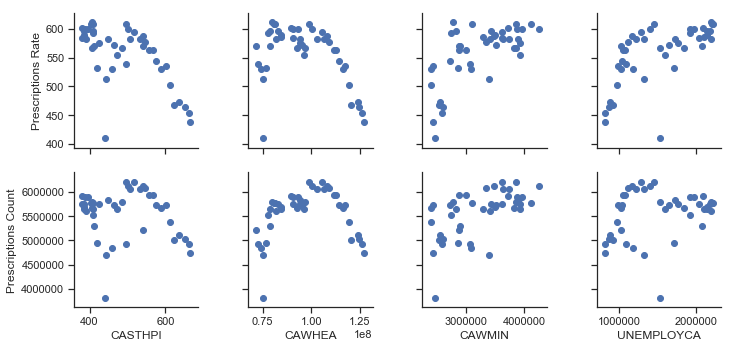

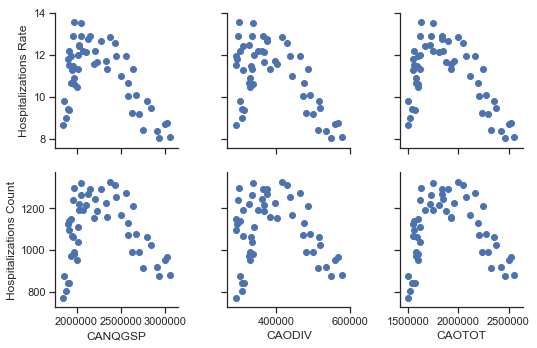

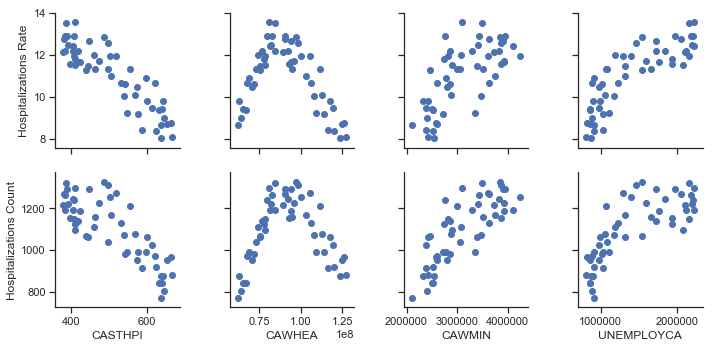

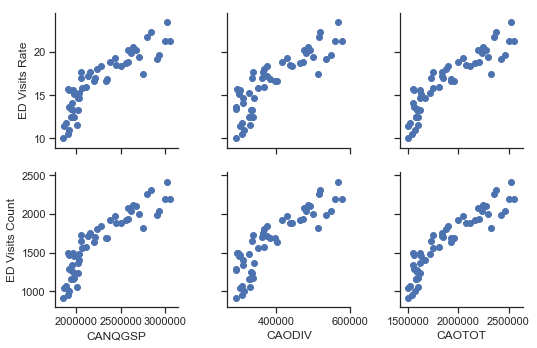

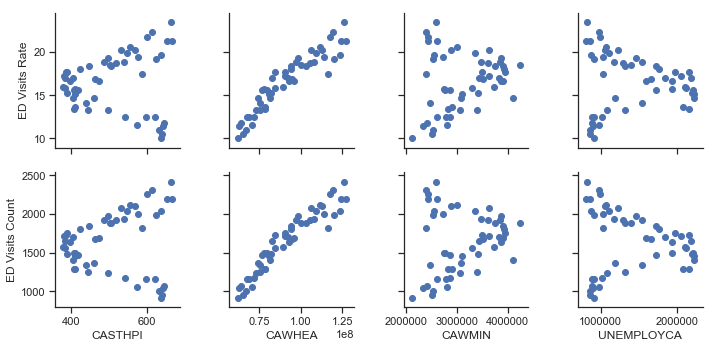

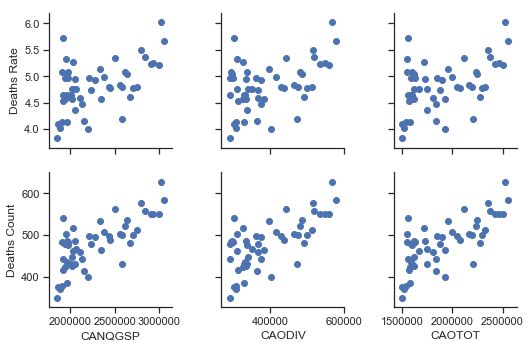

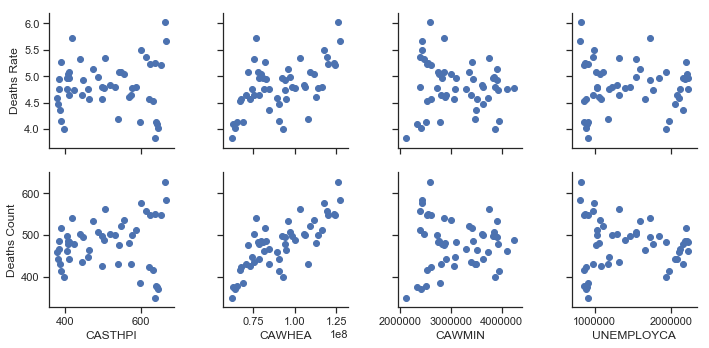

In [7]:
sns.set(style = 'ticks', color_codes = True)


pairplots1 = sns.PairGrid(data[8:-2], x_vars = predictors[:3], 
                          y_vars = ['Prescriptions Rate', 'Prescriptions Count'])
pairplots1 = pairplots1.map(plt.scatter)
pairplots1.fig.subplots_adjust(wspace = 0.4)
pairplots2 = sns.PairGrid(data[8:-2], x_vars = predictors[3:], 
                          y_vars = ['Prescriptions Rate', 'Prescriptions Count'])
pairplots2 = pairplots2.map(plt.scatter)
pairplots2.fig.subplots_adjust(wspace = 0.4)

pairplots3 = sns.PairGrid(data[:-2], x_vars = predictors[:3], 
                          y_vars = ['Hospitalizations Rate', 'Hospitalizations Count'])
pairplots3 = pairplots3.map(plt.scatter)
pairplots3.fig.subplots_adjust(wspace = 0.4)
pairplots4 = sns.PairGrid(data[:-2], x_vars = predictors[3:], 
                          y_vars = ['Hospitalizations Rate', 'Hospitalizations Count'])
pairplots4 = pairplots4.map(plt.scatter)
pairplots4.fig.subplots_adjust(wspace = 0.4)

pairplots5 = sns.PairGrid(data[:-2], x_vars = predictors[:3], 
                          y_vars = ['ED Visits Rate', 'ED Visits Count'])
pairplots5 = pairplots5.map(plt.scatter)
pairplots5.fig.subplots_adjust(wspace = 0.4)
pairplots6 = sns.PairGrid(data[:-2], x_vars = predictors[3:], 
                          y_vars = ['ED Visits Rate', 'ED Visits Count'])
pairplots6 = pairplots6.map(plt.scatter)
pairplots6.fig.subplots_adjust(wspace = 0.4)

pairplots7 = sns.PairGrid(data[:-2], x_vars = predictors[:3], 
                          y_vars = ['Deaths Rate', 'Deaths Count'])
pairplots7 = pairplots7.map(plt.scatter)
pairplots7.fig.subplots_adjust(wspace = 0.4)
pairplots8 = sns.PairGrid(data[:-2], x_vars = predictors[3:], 
                          y_vars = ['Deaths Rate', 'Deaths Count'])
pairplots8 = pairplots8.map(plt.scatter)
pairplots8.fig.subplots_adjust(wspace = 0.4)


In [8]:
X = data[predictors][:-2]
ED_rate = data['ED Visits Rate'][:-2]
X_train, X_test, y_train, y_test = train_test_split(
    X[['CAWHEA']], ED_rate, 
    train_size = 0.8, test_size=0.2, random_state=0)

In [9]:
lnr_reg = LinearRegression()
lnr_reg.fit(X = X_train, y = y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

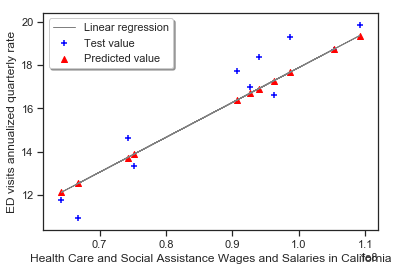

In [10]:
fig, ax = plt.subplots()
y_pred = lnr_reg.predict(X_test)
ax.plot(X_test, y_pred, label = 'Linear regression', color = 'grey', linewidth = 1)
ax.scatter(X_test, y_test, color = 'blue', marker = '+', label = 'Test value')
ax.scatter(X_test, y_pred, color = 'red', marker = '^', label = 'Predicted value')
plt.legend(shadow = True)
plt.xlabel("Health Care and Social Assistance Wages and Salaries in California")
plt.ylabel("ED visits annualized quarterly rate")
plt.show()

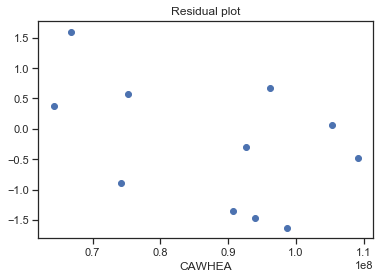

In [11]:
residual = y_pred - y_test
plt.scatter(X_test, residual)
plt.title("Residual plot")
plt.xlabel("CAWHEA")
plt.show()

In [12]:
print("=========================================")
print("<Linear Regression Model using CAWHEA to predict ED visits rate>")
print("Coefficient of determination (R^2): {:.6f}".format(r2_score(y_test, y_pred)))
print("Root Mean Squared Error (RMSE): {:.6f}".format(sqrt(mean_squared_error(y_test, y_pred))))
print("=========================================")

<Linear Regression Model using CAWHEA to predict ED visits rate>
Coefficient of determination (R^2): 0.882193
Root Mean Squared Error (RMSE): 1.010547


In [13]:
Hospitalization_rate = data['Hospitalizations Rate'][:-2]
X_train, X_test, y_train, y_test = train_test_split(
    X[['CASTHPI']], Hospitalization_rate, 
    train_size = 0.8, test_size=0.2, random_state=0)
lnr_reg2 = LinearRegression()
lnr_reg2.fit(X = X_train, y = y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

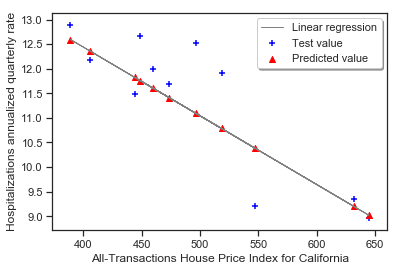

In [14]:
fig, ax2 = plt.subplots()
y_pred = lnr_reg2.predict(X_test)
ax2.plot(X_test, y_pred, label = 'Linear regression', color = 'grey', linewidth = 1)
ax2.scatter(X_test, y_test, color = 'blue', marker = '+', label = 'Test value')
ax2.scatter(X_test, y_pred, color = 'red', marker = '^', label = 'Predicted value')
plt.legend(shadow = True)
plt.xlabel("All-Transactions House Price Index for California")
plt.ylabel("Hospitalizations annualized quarterly rate")
plt.show()

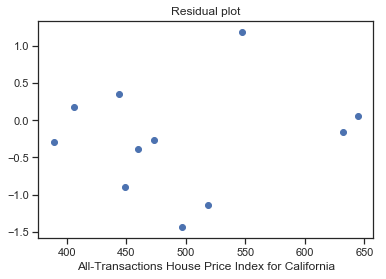

In [15]:
residual = y_pred - y_test
plt.scatter(X_test, residual)
plt.title("Residual plot")
plt.xlabel("All-Transactions House Price Index for California")
plt.show()

In [16]:
print("=========================================")
print("<Linear Regression Model using CASTHPI to predict hospitalization rate>")
print("Coefficient of determination (R^2): {:.6f}".format(r2_score(y_test, y_pred)))
print("Root Mean Squared Error (RMSE): {:.6f}".format(sqrt(mean_squared_error(y_test, y_pred))))
print("=========================================")

<Linear Regression Model using CASTHPI to predict hospitalization rate>
Coefficient of determination (R^2): 0.715172
Root Mean Squared Error (RMSE): 0.741702


In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Hospitalization_rate, 
    train_size = 0.8, test_size=0.2, random_state=0)
rfg_reg2 = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
rfg_reg2.fit(X_train, y_train)
y_pred = rfg_reg2.predict(X_test)
print("============================")
print("Feature importances:")
for i in range(7):
    print('    ', predictors[i], rfg_reg2.feature_importances_[i])

Feature importances:
     CANQGSP 0.0065741627747391285
     CAODIV 0.011114184708654743
     CAOTOT 0.03052661984347413
     CASTHPI 0.575644574308213
     CAWHEA 0.014023151615844553
     CAWMIN 0.09651672821458109
     UNEMPLOYCA 0.2656005785344932


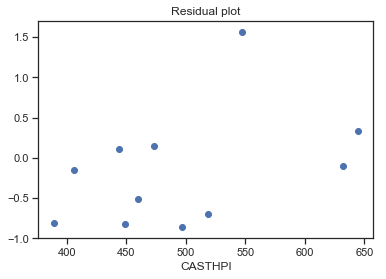

In [18]:
y_pred = rfg_reg2.predict(X_test)
residual = y_pred - y_test
plt.scatter(X_test['CASTHPI'], residual)
plt.title("Residual plot")
plt.xlabel("CASTHPI")
plt.show()

In [19]:
print("=========================================")
print("<Random Forest Regression using all features to predict Hospitalizations rate>")
print("Coefficient of determination (R^2): {:.6f}".format(r2_score(y_test, y_pred)))
print("Root Mean Squared Error (RMSE): {:.6f}".format(sqrt(mean_squared_error(y_test, y_pred))))
print("=========================================")

<Random Forest Regression using all features to predict Hospitalizations rate>
Coefficient of determination (R^2): 0.743464
Root Mean Squared Error (RMSE): 0.703903


/Users/lantingli/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


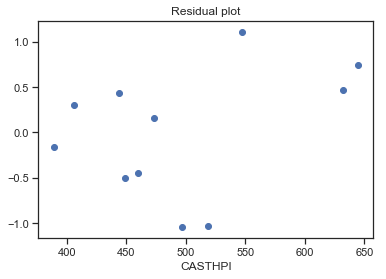

,CANQGSP,CAODIV,CAOTOT,CASTHPI,CAWHEA,CAWMIN,UNEMPLOYCA,Hospitalizations Rate
0,2203605.7,360735.9,1843568.1,405.75,92606456.0,3821496.0,1840800,0.306734
1,2559187.2,464991.1,2167388.9,518.41,105355880.0,3607620.0,1290600,-1.029367
2,1958374.3,330560.7,1585997.8,443.78,75238360.0,3388104.0,1317800,0.430393
3,2429647.3,428625.1,2046036.6,496.34,98647500.0,3863916.0,1461200,-1.043793
4,1883269.3,305833.3,1522251.7,644.75,64251000.0,2409328.0,884800,0.744259
5,2273105.2,375392.6,1897296.0,448.57,94001656.0,3898864.0,1723500,-0.501504
6,2618837.1,479212.0,2232310.8,547.06,109184488.0,3346772.0,1112100,1.107579
7,2329114.5,396819.3,1961849.3,473.61,96248616.0,3917984.0,1598000,0.156085
8,2149461.7,363943.9,1833201.9,388.83,90697840.0,3953292.0,1976000,-0.164240
9,1916188.9,311405.4,1565699.3,631.96,66814380.0,2529520.0,865400,0.463555


In [20]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)  
y_pred = lasso_reg.predict(X_test)
residual = y_pred - y_test
plt.scatter(X_test['CASTHPI'], residual)
plt.title("Residual plot")
plt.xlabel("CASTHPI")
plt.show()
X_test = X_test.set_index(pd.Index([i for i in range(11)]))

residual = pd.DataFrame(residual)
residual = residual.set_index(pd.Index([i for i in range(11)]))
output = pd.concat([X_test,residual], axis = 1)
output

In [21]:
print("=========================================")
print("<Lasso regression using all features to predict Hospitalizations rate>")
print("Coefficient of determination (R^2): {:.6f}".format(r2_score(y_test, y_pred)))
print("Root Mean Squared Error (RMSE): {:.6f}".format(sqrt(mean_squared_error(y_test, y_pred))))
print("=========================================")

<Lasso regression using all features to predict Hospitalizations rate>
Coefficient of determination (R^2): 0.768203
Root Mean Squared Error (RMSE): 0.669102


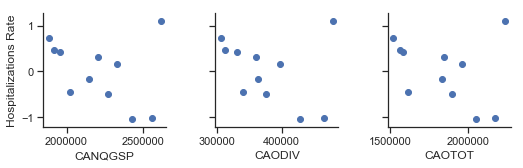

In [22]:
pairplots = sns.PairGrid(output, x_vars = predictors[:3], 
                          y_vars = ['Hospitalizations Rate'])
pairplots = pairplots.map(plt.scatter)
pairplots.fig.subplots_adjust(wspace = 0.4)

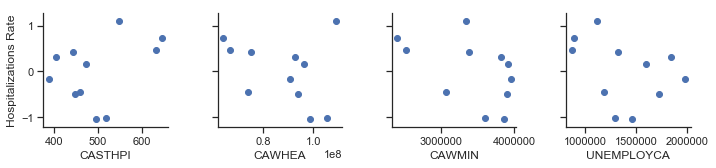

In [23]:
pairplots = sns.PairGrid(output, x_vars = predictors[3:], 
                          y_vars = ['Hospitalizations Rate'])
pairplots = pairplots.map(plt.scatter)
pairplots.fig.subplots_adjust(wspace = 0.4)